# Navigation

---

In this notebook,  we will use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment




#### 1.1 Unity ML-Agents
Unity Machine Learning Agents (ML-Agents) is an open-source Unity plugin that enables games and simulations to serve as environments for training intelligent agents. For game developers, these trained agents can be used for multiple purposes, including controlling [NPC](https://en.wikipedia.org/wiki/Non-player_character) behavior (in a variety of settings such as multi-agent and adversarial), automated testing of game builds and evaluating different game design decisions pre-release.

In this project, we will use Unity's rich environments to design, train, and evaluate your own deep reinforcement learning algorithms. You can read more about ML-Agents by perusing the [GitHub repository](https://github.com/Unity-Technologies/ml-agents).




#### 1.2 The environment

For this project, we will train an agent to navigate (and collect bananas!) in a large, square world.
A reward of +1 is provided for collecting a yellow banana, and a reward of -1 is provided for collecting a blue banana. Thus, the goal of your agent is to collect as many yellow bananas as possible while avoiding blue bananas.

![SegmentLocal](banana.gif "banana")

The state space has 37 dimensions and contains the agent's velocity, along with ray-based perception of objects around the agent's forward direction. Given this information, the agent has to learn how to best select actions. Four discrete actions are available, corresponding to:

- 0 move forward.
- 1 move backward.
- 2 turn left.
- 3 turn right.

The task is episodic, and in order to solve the environment, your agent must get an average score of +13 over 100 consecutive episodes.

**Note:**
The project environment is similar to, but not identical to the Banana Collector environment on the Unity ML-Agents GitHub page.




#### 1.3 Packages
We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, we will see how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, we can watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows us to observe the agent, as it moves through the environment.  

Of course, as part of the project, we will change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


### 4. Train the agent

Next train our own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Instantiate the Environment and Agent
from agent import Agent
framework = 'DQN'  #  'DQN' or 'DDQN'
buffer_type = 'PER_ReplayBuffer'  
#buffer_type = 'ReplayBuffer' 
# setup parameter framework to determine whether to use DQN or DDQN; Different framework has different def of function "learn"
agent = Agent(state_size=state_size, action_size=action_size, seed=0, framework = framework, buffer_type = buffer_type)


In [8]:
# watch an untrained agent
env_info = env.reset(train_mode=True)[brain_name]
state = env_info.vector_observations[0]            # get the current state
score = 0  
for j in range(200):
    action = agent.act(state)
    env_info = env.step(action)[brain_name]
    next_state = env_info.vector_observations[0]
    reward = env_info.rewards[0]
    done = env_info.local_done[0]
    #state, reward, done, _ = env.step(action)
    if done:
        break 
        
print('Score: {}'.format(score))

Score: 0


#### Train the Agent with framework is DQN or DDQN and buffer type is Replay Buffer or PER Replay Buffer

In [9]:
def dqn_ddqn(n_episodes=3000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.99):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        # state = env.reset() old
        env_info = env.reset(train_mode=True)[brain_name] #new
        state = env_info.vector_observations[0] #new
        
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            
            env_info = env.step(action)[brain_name] #new
            next_state = env_info.vector_observations[0] #new
            reward = env_info.rewards[0] #new
            done = env_info.local_done[0] #new

            
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), framework + '_' + buffer_type + '_' + 'checkpoint.pth')
            #break
    return scores

In [10]:
scores = dqn_ddqn()

Episode 100	Average Score: 0.88
Episode 200	Average Score: 4.88
Episode 300	Average Score: 8.38
Episode 400	Average Score: 12.07
Episode 487	Average Score: 13.05
Environment solved in 387 episodes!	Average Score: 13.05
Episode 488	Average Score: 13.09
Environment solved in 388 episodes!	Average Score: 13.09
Episode 489	Average Score: 13.16
Environment solved in 389 episodes!	Average Score: 13.16
Episode 490	Average Score: 13.13
Environment solved in 390 episodes!	Average Score: 13.13
Episode 491	Average Score: 13.09
Environment solved in 391 episodes!	Average Score: 13.09
Episode 492	Average Score: 13.09
Environment solved in 392 episodes!	Average Score: 13.09
Episode 493	Average Score: 13.11
Environment solved in 393 episodes!	Average Score: 13.11
Episode 494	Average Score: 13.02
Environment solved in 394 episodes!	Average Score: 13.02
Episode 495	Average Score: 13.08
Environment solved in 395 episodes!	Average Score: 13.08
Episode 496	Average Score: 13.04
Environment solved in 396 ep

Episode 589	Average Score: 13.70
Environment solved in 489 episodes!	Average Score: 13.70
Episode 590	Average Score: 13.72
Environment solved in 490 episodes!	Average Score: 13.72
Episode 591	Average Score: 13.80
Environment solved in 491 episodes!	Average Score: 13.80
Episode 592	Average Score: 13.90
Environment solved in 492 episodes!	Average Score: 13.90
Episode 593	Average Score: 13.81
Environment solved in 493 episodes!	Average Score: 13.81
Episode 594	Average Score: 13.89
Environment solved in 494 episodes!	Average Score: 13.89
Episode 595	Average Score: 13.93
Environment solved in 495 episodes!	Average Score: 13.93
Episode 596	Average Score: 13.99
Environment solved in 496 episodes!	Average Score: 13.99
Episode 597	Average Score: 13.97
Environment solved in 497 episodes!	Average Score: 13.97
Episode 598	Average Score: 13.95
Environment solved in 498 episodes!	Average Score: 13.95
Episode 599	Average Score: 13.99
Environment solved in 499 episodes!	Average Score: 13.99
Episode 60

Episode 681	Average Score: 14.22
Environment solved in 581 episodes!	Average Score: 14.22
Episode 682	Average Score: 14.11
Environment solved in 582 episodes!	Average Score: 14.11
Episode 683	Average Score: 14.09
Environment solved in 583 episodes!	Average Score: 14.09
Episode 684	Average Score: 14.06
Environment solved in 584 episodes!	Average Score: 14.06
Episode 685	Average Score: 14.22
Environment solved in 585 episodes!	Average Score: 14.22
Episode 686	Average Score: 14.27
Environment solved in 586 episodes!	Average Score: 14.27
Episode 687	Average Score: 14.26
Environment solved in 587 episodes!	Average Score: 14.26
Episode 688	Average Score: 14.29
Environment solved in 588 episodes!	Average Score: 14.29
Episode 689	Average Score: 14.26
Environment solved in 589 episodes!	Average Score: 14.26
Episode 690	Average Score: 14.20
Environment solved in 590 episodes!	Average Score: 14.20
Episode 691	Average Score: 14.16
Environment solved in 591 episodes!	Average Score: 14.16
Episode 69

Episode 773	Average Score: 14.59
Environment solved in 673 episodes!	Average Score: 14.59
Episode 774	Average Score: 14.66
Environment solved in 674 episodes!	Average Score: 14.66
Episode 775	Average Score: 14.65
Environment solved in 675 episodes!	Average Score: 14.65
Episode 776	Average Score: 14.66
Environment solved in 676 episodes!	Average Score: 14.66
Episode 777	Average Score: 14.62
Environment solved in 677 episodes!	Average Score: 14.62
Episode 778	Average Score: 14.61
Environment solved in 678 episodes!	Average Score: 14.61
Episode 779	Average Score: 14.70
Environment solved in 679 episodes!	Average Score: 14.70
Episode 780	Average Score: 14.59
Environment solved in 680 episodes!	Average Score: 14.59
Episode 781	Average Score: 14.57
Environment solved in 681 episodes!	Average Score: 14.57
Episode 782	Average Score: 14.66
Environment solved in 682 episodes!	Average Score: 14.66
Episode 783	Average Score: 14.67
Environment solved in 683 episodes!	Average Score: 14.67
Episode 78

Episode 865	Average Score: 14.57
Environment solved in 765 episodes!	Average Score: 14.57
Episode 866	Average Score: 14.50
Environment solved in 766 episodes!	Average Score: 14.50
Episode 867	Average Score: 14.53
Environment solved in 767 episodes!	Average Score: 14.53
Episode 868	Average Score: 14.52
Environment solved in 768 episodes!	Average Score: 14.52
Episode 869	Average Score: 14.50
Environment solved in 769 episodes!	Average Score: 14.50
Episode 870	Average Score: 14.39
Environment solved in 770 episodes!	Average Score: 14.39
Episode 871	Average Score: 14.44
Environment solved in 771 episodes!	Average Score: 14.44
Episode 872	Average Score: 14.41
Environment solved in 772 episodes!	Average Score: 14.41
Episode 873	Average Score: 14.44
Environment solved in 773 episodes!	Average Score: 14.44
Episode 874	Average Score: 14.39
Environment solved in 774 episodes!	Average Score: 14.39
Episode 875	Average Score: 14.40
Environment solved in 775 episodes!	Average Score: 14.40
Episode 87

Episode 957	Average Score: 14.56
Environment solved in 857 episodes!	Average Score: 14.56
Episode 958	Average Score: 14.61
Environment solved in 858 episodes!	Average Score: 14.61
Episode 959	Average Score: 14.68
Environment solved in 859 episodes!	Average Score: 14.68
Episode 960	Average Score: 14.74
Environment solved in 860 episodes!	Average Score: 14.74
Episode 961	Average Score: 14.69
Environment solved in 861 episodes!	Average Score: 14.69
Episode 962	Average Score: 14.70
Environment solved in 862 episodes!	Average Score: 14.70
Episode 963	Average Score: 14.70
Environment solved in 863 episodes!	Average Score: 14.70
Episode 964	Average Score: 14.69
Environment solved in 864 episodes!	Average Score: 14.69
Episode 965	Average Score: 14.71
Environment solved in 865 episodes!	Average Score: 14.71
Episode 966	Average Score: 14.74
Environment solved in 866 episodes!	Average Score: 14.74
Episode 967	Average Score: 14.78
Environment solved in 867 episodes!	Average Score: 14.78
Episode 96

Episode 1048	Average Score: 15.40
Environment solved in 948 episodes!	Average Score: 15.40
Episode 1049	Average Score: 15.32
Environment solved in 949 episodes!	Average Score: 15.32
Episode 1050	Average Score: 15.38
Environment solved in 950 episodes!	Average Score: 15.38
Episode 1051	Average Score: 15.39
Environment solved in 951 episodes!	Average Score: 15.39
Episode 1052	Average Score: 15.45
Environment solved in 952 episodes!	Average Score: 15.45
Episode 1053	Average Score: 15.49
Environment solved in 953 episodes!	Average Score: 15.49
Episode 1054	Average Score: 15.47
Environment solved in 954 episodes!	Average Score: 15.47
Episode 1055	Average Score: 15.38
Environment solved in 955 episodes!	Average Score: 15.38
Episode 1056	Average Score: 15.38
Environment solved in 956 episodes!	Average Score: 15.38
Episode 1057	Average Score: 15.40
Environment solved in 957 episodes!	Average Score: 15.40
Episode 1058	Average Score: 15.39
Environment solved in 958 episodes!	Average Score: 15.39

Episode 1138	Average Score: 15.50
Environment solved in 1038 episodes!	Average Score: 15.50
Episode 1139	Average Score: 15.59
Environment solved in 1039 episodes!	Average Score: 15.59
Episode 1140	Average Score: 15.57
Environment solved in 1040 episodes!	Average Score: 15.57
Episode 1141	Average Score: 15.71
Environment solved in 1041 episodes!	Average Score: 15.71
Episode 1142	Average Score: 15.68
Environment solved in 1042 episodes!	Average Score: 15.68
Episode 1143	Average Score: 15.68
Environment solved in 1043 episodes!	Average Score: 15.68
Episode 1144	Average Score: 15.70
Environment solved in 1044 episodes!	Average Score: 15.70
Episode 1145	Average Score: 15.65
Environment solved in 1045 episodes!	Average Score: 15.65
Episode 1146	Average Score: 15.62
Environment solved in 1046 episodes!	Average Score: 15.62
Episode 1147	Average Score: 15.59
Environment solved in 1047 episodes!	Average Score: 15.59
Episode 1148	Average Score: 15.55
Environment solved in 1048 episodes!	Average S

Episode 1228	Average Score: 15.99
Environment solved in 1128 episodes!	Average Score: 15.99
Episode 1229	Average Score: 16.10
Environment solved in 1129 episodes!	Average Score: 16.10
Episode 1230	Average Score: 16.12
Environment solved in 1130 episodes!	Average Score: 16.12
Episode 1231	Average Score: 16.10
Environment solved in 1131 episodes!	Average Score: 16.10
Episode 1232	Average Score: 16.13
Environment solved in 1132 episodes!	Average Score: 16.13
Episode 1233	Average Score: 16.08
Environment solved in 1133 episodes!	Average Score: 16.08
Episode 1234	Average Score: 16.11
Environment solved in 1134 episodes!	Average Score: 16.11
Episode 1235	Average Score: 16.10
Environment solved in 1135 episodes!	Average Score: 16.10
Episode 1236	Average Score: 16.05
Environment solved in 1136 episodes!	Average Score: 16.05
Episode 1237	Average Score: 16.11
Environment solved in 1137 episodes!	Average Score: 16.11
Episode 1238	Average Score: 16.07
Environment solved in 1138 episodes!	Average S

Episode 1318	Average Score: 15.39
Environment solved in 1218 episodes!	Average Score: 15.39
Episode 1319	Average Score: 15.34
Environment solved in 1219 episodes!	Average Score: 15.34
Episode 1320	Average Score: 15.33
Environment solved in 1220 episodes!	Average Score: 15.33
Episode 1321	Average Score: 15.29
Environment solved in 1221 episodes!	Average Score: 15.29
Episode 1322	Average Score: 15.18
Environment solved in 1222 episodes!	Average Score: 15.18
Episode 1323	Average Score: 15.20
Environment solved in 1223 episodes!	Average Score: 15.20
Episode 1324	Average Score: 15.19
Environment solved in 1224 episodes!	Average Score: 15.19
Episode 1325	Average Score: 15.13
Environment solved in 1225 episodes!	Average Score: 15.13
Episode 1326	Average Score: 15.15
Environment solved in 1226 episodes!	Average Score: 15.15
Episode 1327	Average Score: 15.10
Environment solved in 1227 episodes!	Average Score: 15.10
Episode 1328	Average Score: 15.14
Environment solved in 1228 episodes!	Average S

Episode 1408	Average Score: 15.13
Environment solved in 1308 episodes!	Average Score: 15.13
Episode 1409	Average Score: 15.20
Environment solved in 1309 episodes!	Average Score: 15.20
Episode 1410	Average Score: 15.22
Environment solved in 1310 episodes!	Average Score: 15.22
Episode 1411	Average Score: 15.21
Environment solved in 1311 episodes!	Average Score: 15.21
Episode 1412	Average Score: 15.20
Environment solved in 1312 episodes!	Average Score: 15.20
Episode 1413	Average Score: 15.23
Environment solved in 1313 episodes!	Average Score: 15.23
Episode 1414	Average Score: 15.23
Environment solved in 1314 episodes!	Average Score: 15.23
Episode 1415	Average Score: 15.25
Environment solved in 1315 episodes!	Average Score: 15.25
Episode 1416	Average Score: 15.27
Environment solved in 1316 episodes!	Average Score: 15.27
Episode 1417	Average Score: 15.20
Environment solved in 1317 episodes!	Average Score: 15.20
Episode 1418	Average Score: 15.18
Environment solved in 1318 episodes!	Average S

Episode 1498	Average Score: 15.20
Environment solved in 1398 episodes!	Average Score: 15.20
Episode 1499	Average Score: 15.14
Environment solved in 1399 episodes!	Average Score: 15.14
Episode 1500	Average Score: 15.17

Environment solved in 1400 episodes!	Average Score: 15.17
Episode 1501	Average Score: 15.17
Environment solved in 1401 episodes!	Average Score: 15.17
Episode 1502	Average Score: 15.15
Environment solved in 1402 episodes!	Average Score: 15.15
Episode 1503	Average Score: 15.18
Environment solved in 1403 episodes!	Average Score: 15.18
Episode 1504	Average Score: 15.08
Environment solved in 1404 episodes!	Average Score: 15.08
Episode 1505	Average Score: 15.07
Environment solved in 1405 episodes!	Average Score: 15.07
Episode 1506	Average Score: 15.14
Environment solved in 1406 episodes!	Average Score: 15.14
Episode 1507	Average Score: 15.22
Environment solved in 1407 episodes!	Average Score: 15.22
Episode 1508	Average Score: 15.24
Environment solved in 1408 episodes!	Average 

Episode 1588	Average Score: 15.56
Environment solved in 1488 episodes!	Average Score: 15.56
Episode 1589	Average Score: 15.57
Environment solved in 1489 episodes!	Average Score: 15.57
Episode 1590	Average Score: 15.63
Environment solved in 1490 episodes!	Average Score: 15.63
Episode 1591	Average Score: 15.56
Environment solved in 1491 episodes!	Average Score: 15.56
Episode 1592	Average Score: 15.56
Environment solved in 1492 episodes!	Average Score: 15.56
Episode 1593	Average Score: 15.48
Environment solved in 1493 episodes!	Average Score: 15.48
Episode 1594	Average Score: 15.44
Environment solved in 1494 episodes!	Average Score: 15.44
Episode 1595	Average Score: 15.47
Environment solved in 1495 episodes!	Average Score: 15.47
Episode 1596	Average Score: 15.42
Environment solved in 1496 episodes!	Average Score: 15.42
Episode 1597	Average Score: 15.56
Environment solved in 1497 episodes!	Average Score: 15.56
Episode 1598	Average Score: 15.57
Environment solved in 1498 episodes!	Average S

Episode 1678	Average Score: 15.16
Environment solved in 1578 episodes!	Average Score: 15.16
Episode 1679	Average Score: 15.16
Environment solved in 1579 episodes!	Average Score: 15.16
Episode 1680	Average Score: 15.17
Environment solved in 1580 episodes!	Average Score: 15.17
Episode 1681	Average Score: 15.21
Environment solved in 1581 episodes!	Average Score: 15.21
Episode 1682	Average Score: 15.26
Environment solved in 1582 episodes!	Average Score: 15.26
Episode 1683	Average Score: 15.34
Environment solved in 1583 episodes!	Average Score: 15.34
Episode 1684	Average Score: 15.24
Environment solved in 1584 episodes!	Average Score: 15.24
Episode 1685	Average Score: 15.23
Environment solved in 1585 episodes!	Average Score: 15.23
Episode 1686	Average Score: 15.14
Environment solved in 1586 episodes!	Average Score: 15.14
Episode 1687	Average Score: 15.16
Environment solved in 1587 episodes!	Average Score: 15.16
Episode 1688	Average Score: 15.23
Environment solved in 1588 episodes!	Average S

Episode 1768	Average Score: 15.39
Environment solved in 1668 episodes!	Average Score: 15.39
Episode 1769	Average Score: 15.45
Environment solved in 1669 episodes!	Average Score: 15.45
Episode 1770	Average Score: 15.47
Environment solved in 1670 episodes!	Average Score: 15.47
Episode 1771	Average Score: 15.49
Environment solved in 1671 episodes!	Average Score: 15.49
Episode 1772	Average Score: 15.45
Environment solved in 1672 episodes!	Average Score: 15.45
Episode 1773	Average Score: 15.36
Environment solved in 1673 episodes!	Average Score: 15.36
Episode 1774	Average Score: 15.38
Environment solved in 1674 episodes!	Average Score: 15.38
Episode 1775	Average Score: 15.40
Environment solved in 1675 episodes!	Average Score: 15.40
Episode 1776	Average Score: 15.40
Environment solved in 1676 episodes!	Average Score: 15.40
Episode 1777	Average Score: 15.46
Environment solved in 1677 episodes!	Average Score: 15.46
Episode 1778	Average Score: 15.42
Environment solved in 1678 episodes!	Average S

Episode 1858	Average Score: 14.89
Environment solved in 1758 episodes!	Average Score: 14.89
Episode 1859	Average Score: 14.84
Environment solved in 1759 episodes!	Average Score: 14.84
Episode 1860	Average Score: 14.87
Environment solved in 1760 episodes!	Average Score: 14.87
Episode 1861	Average Score: 14.91
Environment solved in 1761 episodes!	Average Score: 14.91
Episode 1862	Average Score: 14.82
Environment solved in 1762 episodes!	Average Score: 14.82
Episode 1863	Average Score: 14.71
Environment solved in 1763 episodes!	Average Score: 14.71
Episode 1864	Average Score: 14.69
Environment solved in 1764 episodes!	Average Score: 14.69
Episode 1865	Average Score: 14.69
Environment solved in 1765 episodes!	Average Score: 14.69
Episode 1866	Average Score: 14.72
Environment solved in 1766 episodes!	Average Score: 14.72
Episode 1867	Average Score: 14.75
Environment solved in 1767 episodes!	Average Score: 14.75
Episode 1868	Average Score: 14.81
Environment solved in 1768 episodes!	Average S

Episode 1948	Average Score: 15.09
Environment solved in 1848 episodes!	Average Score: 15.09
Episode 1949	Average Score: 15.00
Environment solved in 1849 episodes!	Average Score: 15.00
Episode 1950	Average Score: 14.97
Environment solved in 1850 episodes!	Average Score: 14.97
Episode 1951	Average Score: 14.93
Environment solved in 1851 episodes!	Average Score: 14.93
Episode 1952	Average Score: 14.91
Environment solved in 1852 episodes!	Average Score: 14.91
Episode 1953	Average Score: 14.97
Environment solved in 1853 episodes!	Average Score: 14.97
Episode 1954	Average Score: 14.97
Environment solved in 1854 episodes!	Average Score: 14.97
Episode 1955	Average Score: 15.01
Environment solved in 1855 episodes!	Average Score: 15.01
Episode 1956	Average Score: 15.05
Environment solved in 1856 episodes!	Average Score: 15.05
Episode 1957	Average Score: 15.03
Environment solved in 1857 episodes!	Average Score: 15.03
Episode 1958	Average Score: 15.06
Environment solved in 1858 episodes!	Average S

Episode 2038	Average Score: 14.94
Environment solved in 1938 episodes!	Average Score: 14.94
Episode 2039	Average Score: 14.97
Environment solved in 1939 episodes!	Average Score: 14.97
Episode 2040	Average Score: 14.96
Environment solved in 1940 episodes!	Average Score: 14.96
Episode 2041	Average Score: 15.04
Environment solved in 1941 episodes!	Average Score: 15.04
Episode 2042	Average Score: 15.06
Environment solved in 1942 episodes!	Average Score: 15.06
Episode 2043	Average Score: 15.03
Environment solved in 1943 episodes!	Average Score: 15.03
Episode 2044	Average Score: 15.00
Environment solved in 1944 episodes!	Average Score: 15.00
Episode 2045	Average Score: 15.01
Environment solved in 1945 episodes!	Average Score: 15.01
Episode 2046	Average Score: 15.01
Environment solved in 1946 episodes!	Average Score: 15.01
Episode 2047	Average Score: 14.99
Environment solved in 1947 episodes!	Average Score: 14.99
Episode 2048	Average Score: 14.95
Environment solved in 1948 episodes!	Average S

Episode 2128	Average Score: 15.16
Environment solved in 2028 episodes!	Average Score: 15.16
Episode 2129	Average Score: 15.18
Environment solved in 2029 episodes!	Average Score: 15.18
Episode 2130	Average Score: 15.24
Environment solved in 2030 episodes!	Average Score: 15.24
Episode 2131	Average Score: 15.25
Environment solved in 2031 episodes!	Average Score: 15.25
Episode 2132	Average Score: 15.27
Environment solved in 2032 episodes!	Average Score: 15.27
Episode 2133	Average Score: 15.35
Environment solved in 2033 episodes!	Average Score: 15.35
Episode 2134	Average Score: 15.23
Environment solved in 2034 episodes!	Average Score: 15.23
Episode 2135	Average Score: 15.21
Environment solved in 2035 episodes!	Average Score: 15.21
Episode 2136	Average Score: 15.24
Environment solved in 2036 episodes!	Average Score: 15.24
Episode 2137	Average Score: 15.25
Environment solved in 2037 episodes!	Average Score: 15.25
Episode 2138	Average Score: 15.10
Environment solved in 2038 episodes!	Average S

Episode 2218	Average Score: 14.88
Environment solved in 2118 episodes!	Average Score: 14.88
Episode 2219	Average Score: 14.84
Environment solved in 2119 episodes!	Average Score: 14.84
Episode 2220	Average Score: 14.91
Environment solved in 2120 episodes!	Average Score: 14.91
Episode 2221	Average Score: 14.93
Environment solved in 2121 episodes!	Average Score: 14.93
Episode 2222	Average Score: 14.94
Environment solved in 2122 episodes!	Average Score: 14.94
Episode 2223	Average Score: 14.96
Environment solved in 2123 episodes!	Average Score: 14.96
Episode 2224	Average Score: 15.01
Environment solved in 2124 episodes!	Average Score: 15.01
Episode 2225	Average Score: 15.01
Environment solved in 2125 episodes!	Average Score: 15.01
Episode 2226	Average Score: 15.04
Environment solved in 2126 episodes!	Average Score: 15.04
Episode 2227	Average Score: 15.02
Environment solved in 2127 episodes!	Average Score: 15.02
Episode 2228	Average Score: 15.05
Environment solved in 2128 episodes!	Average S

Episode 2308	Average Score: 15.05
Environment solved in 2208 episodes!	Average Score: 15.05
Episode 2309	Average Score: 15.08
Environment solved in 2209 episodes!	Average Score: 15.08
Episode 2310	Average Score: 15.02
Environment solved in 2210 episodes!	Average Score: 15.02
Episode 2311	Average Score: 15.04
Environment solved in 2211 episodes!	Average Score: 15.04
Episode 2312	Average Score: 15.06
Environment solved in 2212 episodes!	Average Score: 15.06
Episode 2313	Average Score: 15.07
Environment solved in 2213 episodes!	Average Score: 15.07
Episode 2314	Average Score: 14.99
Environment solved in 2214 episodes!	Average Score: 14.99
Episode 2315	Average Score: 15.04
Environment solved in 2215 episodes!	Average Score: 15.04
Episode 2316	Average Score: 15.04
Environment solved in 2216 episodes!	Average Score: 15.04
Episode 2317	Average Score: 15.02
Environment solved in 2217 episodes!	Average Score: 15.02
Episode 2318	Average Score: 14.94
Environment solved in 2218 episodes!	Average S

Episode 2398	Average Score: 14.00
Environment solved in 2298 episodes!	Average Score: 14.00
Episode 2399	Average Score: 14.03
Environment solved in 2299 episodes!	Average Score: 14.03
Episode 2400	Average Score: 14.05

Environment solved in 2300 episodes!	Average Score: 14.05
Episode 2401	Average Score: 14.02
Environment solved in 2301 episodes!	Average Score: 14.02
Episode 2402	Average Score: 14.00
Environment solved in 2302 episodes!	Average Score: 14.00
Episode 2403	Average Score: 13.98
Environment solved in 2303 episodes!	Average Score: 13.98
Episode 2404	Average Score: 13.91
Environment solved in 2304 episodes!	Average Score: 13.91
Episode 2405	Average Score: 13.85
Environment solved in 2305 episodes!	Average Score: 13.85
Episode 2406	Average Score: 13.71
Environment solved in 2306 episodes!	Average Score: 13.71
Episode 2407	Average Score: 13.72
Environment solved in 2307 episodes!	Average Score: 13.72
Episode 2408	Average Score: 13.75
Environment solved in 2308 episodes!	Average 

Episode 2488	Average Score: 13.90
Environment solved in 2388 episodes!	Average Score: 13.90
Episode 2489	Average Score: 13.81
Environment solved in 2389 episodes!	Average Score: 13.81
Episode 2490	Average Score: 13.89
Environment solved in 2390 episodes!	Average Score: 13.89
Episode 2491	Average Score: 14.01
Environment solved in 2391 episodes!	Average Score: 14.01
Episode 2492	Average Score: 14.07
Environment solved in 2392 episodes!	Average Score: 14.07
Episode 2493	Average Score: 14.06
Environment solved in 2393 episodes!	Average Score: 14.06
Episode 2494	Average Score: 14.14
Environment solved in 2394 episodes!	Average Score: 14.14
Episode 2495	Average Score: 14.21
Environment solved in 2395 episodes!	Average Score: 14.21
Episode 2496	Average Score: 14.14
Environment solved in 2396 episodes!	Average Score: 14.14
Episode 2497	Average Score: 14.18
Environment solved in 2397 episodes!	Average Score: 14.18
Episode 2498	Average Score: 14.23
Environment solved in 2398 episodes!	Average S

Episode 2578	Average Score: 14.66
Environment solved in 2478 episodes!	Average Score: 14.66
Episode 2579	Average Score: 14.66
Environment solved in 2479 episodes!	Average Score: 14.66
Episode 2580	Average Score: 14.65
Environment solved in 2480 episodes!	Average Score: 14.65
Episode 2581	Average Score: 14.67
Environment solved in 2481 episodes!	Average Score: 14.67
Episode 2582	Average Score: 14.75
Environment solved in 2482 episodes!	Average Score: 14.75
Episode 2583	Average Score: 14.73
Environment solved in 2483 episodes!	Average Score: 14.73
Episode 2584	Average Score: 14.76
Environment solved in 2484 episodes!	Average Score: 14.76
Episode 2585	Average Score: 14.77
Environment solved in 2485 episodes!	Average Score: 14.77
Episode 2586	Average Score: 14.81
Environment solved in 2486 episodes!	Average Score: 14.81
Episode 2587	Average Score: 14.82
Environment solved in 2487 episodes!	Average Score: 14.82
Episode 2588	Average Score: 14.80
Environment solved in 2488 episodes!	Average S

Episode 2668	Average Score: 15.60
Environment solved in 2568 episodes!	Average Score: 15.60
Episode 2669	Average Score: 15.56
Environment solved in 2569 episodes!	Average Score: 15.56
Episode 2670	Average Score: 15.56
Environment solved in 2570 episodes!	Average Score: 15.56
Episode 2671	Average Score: 15.51
Environment solved in 2571 episodes!	Average Score: 15.51
Episode 2672	Average Score: 15.64
Environment solved in 2572 episodes!	Average Score: 15.64
Episode 2673	Average Score: 15.63
Environment solved in 2573 episodes!	Average Score: 15.63
Episode 2674	Average Score: 15.75
Environment solved in 2574 episodes!	Average Score: 15.75
Episode 2675	Average Score: 15.72
Environment solved in 2575 episodes!	Average Score: 15.72
Episode 2676	Average Score: 15.75
Environment solved in 2576 episodes!	Average Score: 15.75
Episode 2677	Average Score: 15.77
Environment solved in 2577 episodes!	Average Score: 15.77
Episode 2678	Average Score: 15.72
Environment solved in 2578 episodes!	Average S

Episode 2758	Average Score: 15.04
Environment solved in 2658 episodes!	Average Score: 15.04
Episode 2759	Average Score: 15.05
Environment solved in 2659 episodes!	Average Score: 15.05
Episode 2760	Average Score: 15.06
Environment solved in 2660 episodes!	Average Score: 15.06
Episode 2761	Average Score: 15.06
Environment solved in 2661 episodes!	Average Score: 15.06
Episode 2762	Average Score: 15.02
Environment solved in 2662 episodes!	Average Score: 15.02
Episode 2763	Average Score: 15.00
Environment solved in 2663 episodes!	Average Score: 15.00
Episode 2764	Average Score: 15.01
Environment solved in 2664 episodes!	Average Score: 15.01
Episode 2765	Average Score: 14.95
Environment solved in 2665 episodes!	Average Score: 14.95
Episode 2766	Average Score: 14.91
Environment solved in 2666 episodes!	Average Score: 14.91
Episode 2767	Average Score: 14.88
Environment solved in 2667 episodes!	Average Score: 14.88
Episode 2768	Average Score: 14.86
Environment solved in 2668 episodes!	Average S

Episode 2848	Average Score: 14.73
Environment solved in 2748 episodes!	Average Score: 14.73
Episode 2849	Average Score: 14.81
Environment solved in 2749 episodes!	Average Score: 14.81
Episode 2850	Average Score: 14.87
Environment solved in 2750 episodes!	Average Score: 14.87
Episode 2851	Average Score: 14.84
Environment solved in 2751 episodes!	Average Score: 14.84
Episode 2852	Average Score: 14.92
Environment solved in 2752 episodes!	Average Score: 14.92
Episode 2853	Average Score: 14.83
Environment solved in 2753 episodes!	Average Score: 14.83
Episode 2854	Average Score: 14.84
Environment solved in 2754 episodes!	Average Score: 14.84
Episode 2855	Average Score: 14.87
Environment solved in 2755 episodes!	Average Score: 14.87
Episode 2856	Average Score: 14.83
Environment solved in 2756 episodes!	Average Score: 14.83
Episode 2857	Average Score: 14.87
Environment solved in 2757 episodes!	Average Score: 14.87
Episode 2858	Average Score: 14.89
Environment solved in 2758 episodes!	Average S

Episode 2938	Average Score: 14.91
Environment solved in 2838 episodes!	Average Score: 14.91
Episode 2939	Average Score: 14.89
Environment solved in 2839 episodes!	Average Score: 14.89
Episode 2940	Average Score: 14.87
Environment solved in 2840 episodes!	Average Score: 14.87
Episode 2941	Average Score: 14.87
Environment solved in 2841 episodes!	Average Score: 14.87
Episode 2942	Average Score: 14.79
Environment solved in 2842 episodes!	Average Score: 14.79
Episode 2943	Average Score: 14.77
Environment solved in 2843 episodes!	Average Score: 14.77
Episode 2944	Average Score: 14.72
Environment solved in 2844 episodes!	Average Score: 14.72
Episode 2945	Average Score: 14.67
Environment solved in 2845 episodes!	Average Score: 14.67
Episode 2946	Average Score: 14.73
Environment solved in 2846 episodes!	Average Score: 14.73
Episode 2947	Average Score: 14.72
Environment solved in 2847 episodes!	Average Score: 14.72
Episode 2948	Average Score: 14.77
Environment solved in 2848 episodes!	Average S

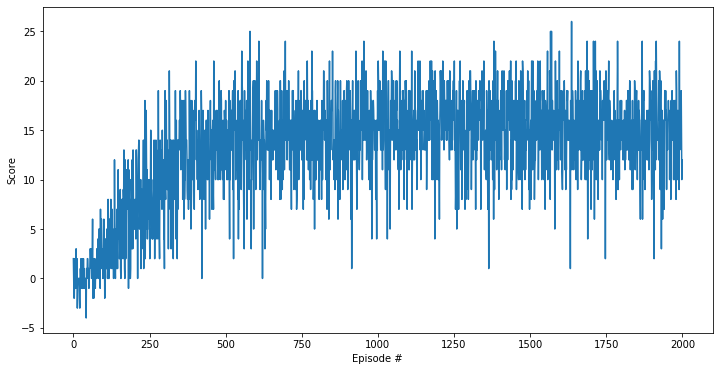

In [13]:
# plot the scores
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores[0:2000])), scores[0:2000])
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig(framework + '_' + buffer_type  + '.png')

### 5. Watch a smart engine

In [12]:
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load(framework + '_' + buffer_type + '_' + 'checkpoint.pth', map_location=lambda storage, loc: storage))

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score

    agent.step(state, action, reward, next_state, done)
    state = next_state
    if done:                                       # exit loop if episode finished
        break

print("Score: {}".format(score))

Score: 13.0
